#### What is Histplot
An efficient 2D Scatterplot alternitive for inspecting large datasets

#### What's wrong with a scatterplot?
* It takes a very long time (<span style="color:red">38.8 seconds</span> in this case) to produce a ~1Million point graph in pyplot
* Points overlap and hide points underneath

#### How is this different?
* Labels are assigned a RGB color
* A 2D histogram is created for each label
* RGB matricies for all labels are combined and normalized to produce a single RGB image
* Much faster (<span style="color:Green">0.4 seconds</span>)
* <span style="color:Green">No obstruction</span>
* <span style="color:red">Can be difficult to see edge cases</span>


<table align="left"><tr><td style="text-align:center">Scatter</td><td style="text-align:center">Hist</td><td style="text-align:center">Hist (with gain)</td></tr><tr><td><img src='scatter.png'  style="width:220px;height:200px;"></td><td><img src='hist2.png' style="width:200px;height:200px;"></td><td><img src='hist.png' style="width:200px;height:200px;"></td></tr></table>


In [1]:
from time import time

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def hist2D(x,y,bins,r,c,norm=False,gain=1):
    h = np.histogram2d(x,y,bins,range=r)[0].T.reshape((bins,bins,1))
    H = np.concatenate((h*c[0],h*c[1],h*c[2]),axis=2)
    
    if norm:
        H = (H/H.max())**(1/gain)
        H[H>1]=1
        return H
    return H

def histplot(x, 
             y, 
             labels, 
             bins=100, 
             normalize_each_label=False, 
             range=None, 
             colors=[[1,0,0],[0,1,0]],
             gain = 1):
    
    # If Range is not specified set it to the min and max of x and y respectively
    if range==None:
        range=np.array(((x.min(),x.max()),(y.min(),y.max())))
    else:
        range = np.array(range)
        if not range.shape == (2,2):
            raise ValueError('range should be array-like with shape (2,2). {} is not valid'.format(range))
    
    
    # Initiallize RGB image to zeros
    H = np.zeros((bins,bins,3))
    
    
    # Add each label's histogram to H
    for i,l in enumerate(list(set(labels))):
        idxs = np.where(labels==l)[0]
        H = H + hist2D(x[idxs],
                       y[idxs],
                       bins,
                       range,
                       colors[l],
                       normalize_each_label,
                       gain
                      )
    
    # Normalize and apply gain
    im = H/H.max()
    im[im.sum(2)==0]=1
    
    # Plot image
    plt.imshow(np.flip(im,0)) # Must be flipped because vertex is at top left for images
    
    
    # Draw axes
    range_x = np.round(np.linspace(range[0][0],range[0][1],bins),2)
    range_y = np.round(np.linspace(range[1][0],range[1][1],bins),2)
    _ = np.arange(0,bins-1,(bins-1)//5)
    plt.xticks(_, range_x[_])
    plt.yticks(_, range_y[-_-1])
    
    # Show image
    plt.show()
    
        

### Make example dataset
Say we have 1Million datapoints of the form (x, y, target), where target is $\in$ $[0, 1, 2]$.

In [3]:
N = 500000
M = 50000
K = 500000

dist_1 = np.random.normal(loc = (-0.2,0.4), scale = (0.5,0.5), size = (N,2))
dist_2 = np.random.normal(loc = (0,0), scale = (0.1,0.1), size = (M,2))
dist_3 = np.random.normal(loc = (0.4,0.4), scale = (0.5,0.5), size = (K,2))

In [4]:
X = np.hstack((dist_1[:,0],dist_2[:,0],dist_3[:,0]))
Y = np.hstack((dist_1[:,1],dist_2[:,1],dist_3[:,1]))
labels = np.array(([0]*N) + ([1]*M)+[2]*K)
print(X.shape,Y.shape,labels.shape)

(1050000,) (1050000,) (1050000,)


## Dist_2 is not visible at all
Of course I intended this for demonstration purposes

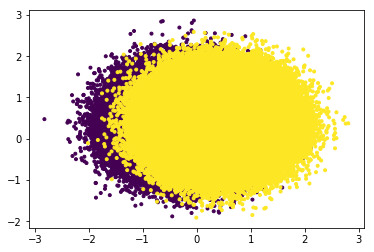

Scatterplot drawn in 41.19 seconds


In [5]:

t0 = time()
plt.scatter(X,Y,c=labels,marker='.')
plt.show()

print('Scatterplot drawn in {} seconds'.format(round(time()-t0,2)))


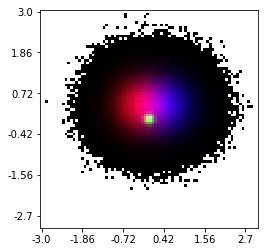

Histogram drawn in 0.36 seconds


In [9]:
t0 = time()

histplot(
    X,
    Y,
    labels,
    bins=80,
    range=((-3,3),(-3,3)),
    normalize_each_label=True,
    colors = [
        [1,0,0],
        [0,1,0],
        [0,0,1]],
    gain=1)

print('Histogram drawn in {} seconds'.format(round(time()-t0,2)))

## Gain Parameter
The graph above has gain set to 1 (no gain). Below, we set the gain to 20. For each label, we raise the pixel data (which spans $[0,1]$ ) to the power of $\dfrac{1}{gain}$. The effect this has is to make the edges of the distributions more easy noticable. We could impliment a step-function-esque behaviour, where if any part of the image has at least one sample then set that pixel to the color of the category


## Large bins and gain gets us close to an ideal scatter plot

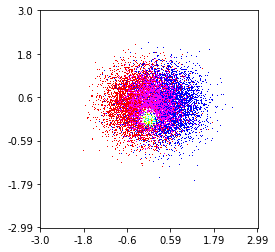

Histogram drawn in 3.26 seconds


In [17]:
t0 = time()

histplot(
    X,
    Y,
    labels,
    bins=2000,
    range=((-3,3),(-3,3)),
    normalize_each_label=True,
    colors = [
        [1,0,0],
        [0,1,0],
        [0,0,1]],
    gain=50)

print('Histogram drawn in {} seconds'.format(round(time()-t0,2)))

## No Normalization
Using the argument
`normalize_each_label=False`
allows us to see the relative densities. From this image it is quite clear that the green cluster is much denser than the others. This also makes `gain` parameter meaningless

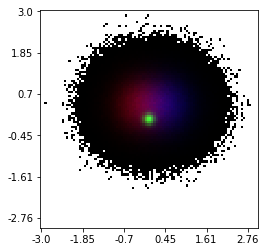

Histogram drawn in 0.36 seconds


In [14]:
t0 = time()

histplot(
    X,
    Y,
    labels,
    bins=100,
    range=((-3,3),(-3,3)),
    normalize_each_label=False,
    colors = [
        [1,0,0],
        [0,1,0],
        [0,0,1]],
    gain=1)

print('Histogram drawn in {} seconds'.format(round(time()-t0,2)))